In [22]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from scipy.linalg.misc import norm
from numpy import *

learning_rate=0.005
time=400
C=5

def get_data():
    data = load_svmlight_file("australian_scale.txt")
    return data[0], data[1]

X,y=get_data()
loss_trainhistory=[]
loss_testhistory=[]

X=np.hstack([X.toarray(), np.ones((X.shape[0], 1))])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_train=y_train.reshape(-1,1)

w=np.random.random((1,15))

In [23]:
for k in range(time):
    trainloss=0.5*(np.linalg.norm(w,2)**2)+C*np.mean(np.maximum(1-y_train*X_train.dot(w.T),0))
    testloss=0.5*(np.linalg.norm(w,2)**2)+C*np.mean(np.maximum(1-y_test*X_test.dot(w.T),0))
    loss_trainhistory.append(trainloss)
    loss_testhistory.append(testloss)
    a1=1-y_train*X_train.dot(w.T)
    dw=np.zeros((1,X_train.shape[1]))
    for i in range(a1.shape[0]):
        if a1[i]>=0:
            dw+=-y_train[i]*X_train[i].reshape((1,15))
        
    dw=C*dw/X_train.shape[0]+w
    w=w-learning_rate*dw

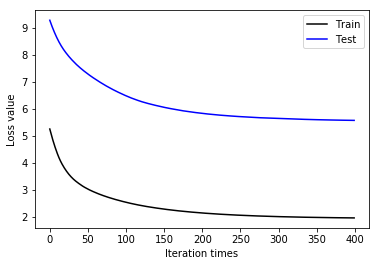

In [24]:
plt.plot(loss_trainhistory,'black',label='Train')
plt.plot(loss_testhistory,'blue',label='Test')
plt.xlabel('Iteration times')
plt.ylabel('Loss value')
plt.legend()
plt.show()

In [25]:
t = X_test.dot(w.T) > 0
count = 0
for i in range(X_test.shape[0]):
    if t[i][0] == False and y_test[i]== -1:
        count = count + 1
    elif t[i][0] == True and y_test[i]== 1:
        count = count + 1

count / y_test.shape[0]

0.855072463768116

In [26]:
t = X_train.dot(w.T) > 0
count = 0
for i in range(X_train.shape[0]):
    if t[i][0] == False and y_train[i]== -1:
        count = count + 1
    elif t[i][0] == True and y_train[i]== 1:
        count = count + 1

count / X_train.shape[0]

0.855072463768116